<a href="https://colab.research.google.com/github/samuelbolugee/PythonDSProjects/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis 2
###By Samuel B. Olugunna

Welcome back to the second in a series of projects on data science and machine learning! In this project, I'll try to expand further on exploratory data analytics by looking at things like skewness, kurtosis and the five-number summary.

As always, I'll try to be explanatory enough, as this is also a learning process for me.

Let's begin!

###Skewness and Kurtosis

The most popular probability distribution observed in data is the normal distribution, defined by a symmetrical bell-shaped curve. A good example of this would be the distribution of heights or IQ scores in a typical class of students. However, under the influence of significant causes, the normal distribution can get distorted. This distortion can be observed and calculated using skewness and kurtosis.

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

If a distribution is symmetric, the mean, median, and mode are all the same, and the skewness is zero. However, if a distribution is skewed, the mean, median, and mode are different, and the skewness is non-zero. Skewness can be positive, indicating that the distribution has a long tail on the right side (the values are more concentrated towards the right side, and the left tail is spread out), or negative, indicating that the distribution has a long tail on the left side (the data points are more concentrated towards the right-hand side of the distribution, making the mean, median, and mode bend towards the right). Skewness can be measured using a variety of statistics, such as the Pearson skewness coefficient or the Bowley skewness coefficient.

Kurtosis, on the other hand, is a measure of the peakedness of a probability distribution. A distribution with high kurtosis has a sharper peak and heavier tails than a distribution with low kurtosis. A distribution with kurtosis equal to three is called mesokurtic and has a normal distribution. A distribution with kurtosis greater than three is called leptokurtic and has more data points clustered around the mean, while a distribution with kurtosis less than three is called platykurtic and has fewer data points clustered around the mean. Kurtosis can be measured using statistics such as the Pearson kurtosis coefficient or the Fisher kurtosis coefficient.

Understanding the shape of data is crucial while practicing data science. It helps to understand where the most information lies and analyze the outliers in a given data. 

See below for an illustration of skewness and kurtosis:

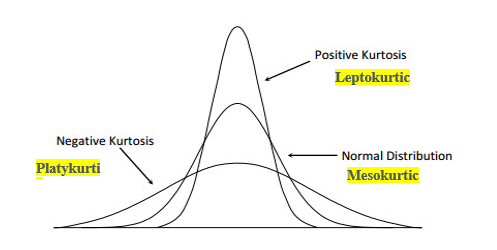 

***Representation of kurtosis in probability distributions.***

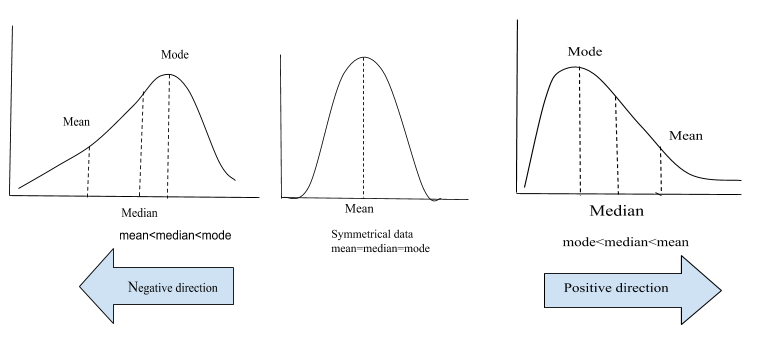


***Representation of skewness in probability distributions.***


With that being said, let's demonstrate!

##Using SciPy to Calculate Skewness and Kurtosis:

Firstly, we must import SciPy. This will help us run the calculations for both skewness and kurtosis.

Next, we create a dataset (or utilize an existing dataset).

Finally, we call the scipy.stats.skew() or scipy.stats.kurtosis() function, pass in the necessary parameters and get our values.

Let's take them one after the other, beginning with skewness.

In [1]:
import scipy
from scipy.stats import skew

In [2]:
# Creating a dataset
dataset = [8, 5, 2, 7, 6, 7.7, 7.4, 6,
		8.1, 9.5, 7.7, 8.8, 5, 3.6, 10]

# Calculate the skewness
print(skew(dataset, axis=0, bias=True))


-0.606620273705261


Looking at the scipy.stats.skew() function, we can get the following information:

Syntax:

```
scipy.stats.skew(a, axis=0, bias=True, nan_policy='propagate', *, keepdims=False)
```

Parameters:

a: The input array (or object) containing elements.

axis: It signifies the axis along which we want to find the skewness value (By default axis = 0). If an int, the axis of the input along which to compute the statistic. The statistic of each axis-slice (e.g. row) of the input will appear in a corresponding element of the output.

bias = False: Calculations are corrected to statistical bias.

Computes the skewness value of the data set, along the axis.

See the [scipy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) for more on this function.

For kurtosis, the only thing that really needs to change is what you're importing, and what you're calling (function-wise).

In [3]:
from scipy.stats import kurtosis

# Creating a dataset
data = [8, 5, 2, 7, 6, 7.7, 7.4, 6,
		8.1, 9.5, 7.7, 8.8, 5, 3.6, 10]

# Calculate the kurtosis
print(kurtosis(data, axis=0, fisher = False, bias=True))

2.7253393283294978


The scipy.stats.kurtosis() function is described as thus from the [Scipy docs:](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)

**Syntax:**

`scipy.stats.kurtosis(a, axis=0, fisher=True, bias=True, nan_policy='propagate', *, keepdims=False)`

Computes the kurtosis (Fisher or Pearson) of a dataset.

Kurtosis is the fourth central moment divided by the square of the variance. If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.

If bias is False then the kurtosis is calculated using k statistics to eliminate bias coming from biased moment estimators.

**Parameters:**

a: The input array or object having the elements.

axis: It represents the axis along which the kurtosis value is to be measured. By default axis = 0.

fisher = True: The fisher’s definition will be used (normal 0.0).

fisher =  False: The Pearson’s definition will be used (normal 3.0).

Bias = True: Calculations are corrected for statistical bias, if set to False.

You can check the docs for more information.

Let us interpret these values, shall we:

Firstly, the skewness value we obtained was negative (-0.606).

If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

Since our value is negative and falls between -0.5 and -1, it is moderately left-skewed.

For kurtosis, however, we used the Pearson coefficient in our computations, giving us a value of 2.72, which is less than 3, hence the data is platykurtic.


### Visualizing the data

For us to properly visualize the data, we must first fit a normal distribution to our data. This can be done by calling the norm.fit() method on our data. this will first compute the mean (mu) and standard deviation (sigma), then fit the data with these parameters. Afterwards, we then plot the histogram (very important, as this is what will our curve will be displayed upon, failure to do this will result in a "linear curve" situation, rather than a bell curve), and then plot the probability distribution function. This is achieved using the norm.pdf() function.

The link to info on the scipy.stats.norm object can be found [here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

Thanks to this [Stack Overflow](https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data) article for insights on how to achieve this.

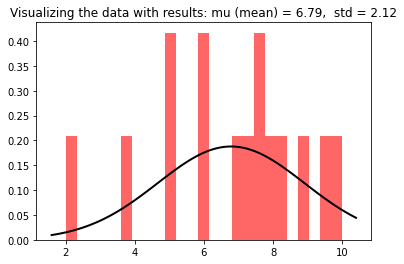

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Use our dataset
data = data

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram
plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# Plotting the probability density function
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Visualizing the data with results: mu (mean) = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

### Using Pandas to Calculate Kurtosis of data on a Series



As you may have noticed, our data so far takes the form of numbers in a list. But say you wish to perform this operation on a Pandas DataFrame. How do you go about it?

Well, it's quite easy. But before we dive further into the specifics, we must take note of one thing: our data is **NOT** a Pandas DataFrame. So, we must convert our list to a Pandas DataFrame.

To do this, we just pass the list into the Pandas.DataFrame() function, and voila! That's all.

It will interest you to note that the Pandas DataFrame has a method called ***kurt()*** which computes the kurtosis for a set of values across a specific axis (i.e., a row or a column). By default, it computes the Fisher's kurtosis, which is basically 3 subtracted from the Pearson's kurtosis (meaning that a normal distribution has a kurtosis value - based on this method - of zero).

Enough talk, let's get to it!

In [6]:
import pandas as pd
df = pd.DataFrame(data)
result = df.kurt()

print(result)

0    0.144077
dtype: float64


##Parametric and Non-Parametric Data Summarization

Data summarization helps describe the distribution of data using a few key measurements.

Parametric data summarization makes use of data based on assumptions about the distribution of population from which the sample was taken. A good example would be a normal distribution, where calculating both the mean and standard deviation would give valuable insights into undesrtanding and replicating the data.

In situations where the data does not follow a normal distribution, we turn to non-parametric data summarization technique. And one such example is the five-number summary.

The five-number summary involves the calculation of 5 statistical quantities: namely:

1. Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
2. 1st Quartile: The 25th percentile.
3. 3rd Quartile: The 75th percentile.
4. Minimum: The smallest observation in the sample.
5. Maximum: The largest observation in the sample.
A quartile is an observed value at a point that aids in splitting the ordered data sample into four equally sized parts. The median, or 2nd Quartile, splits the ordered data sample into two parts, and the 1st and 3rd quartiles split each of those halves into quarters. Percentiles split the ordered data into 100 equal parts.

With that being said, let's see how to achieve this.

There is a NumPy function called the percentile() function that helps with calculating percentiles. It takes the data as an argument, and a list of percentiles to calculate. It returns a list of values corresponding to the provided percentile values, and these values can be accessed via simple list indexing. 

Here is what I mean:

```
numpy.percentile(dataset, [25,50,75])
```

The data and list of percentiles to calculate are already provided.
Finding the highest and lowest valyes involves calling the min() and max() functions on the data. Simple.

In [8]:
from numpy import percentile

# call our dataset
data = data
# calculate the 1st, 2nd and 3rd quartiles
quartiles = percentile(data, [25, 50, 75])
# Find highest and lowest values: remember that in this case we must pass the list as an argument into the functions.
data_min, data_max = min(data), max(data)
# print 5-number summary, to 3 decimal places.
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 2.000
Q1: 5.500
Median: 7.400
Q3: 8.050
Max: 10.000


That's it for now! In the final EDA notebook, I will put all of this and more into practice with a dataset to try and gain relevant insights into the underlying data. Thanks!